In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style("whitegrid")

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
import sys, os

In [4]:
sys.path.append("/Users/hantke/davinci/home/hantke/complex/md/scripts/gmx_tools/")
import xvg

### Force constant

In [5]:
kB = 8.314E-3
T = 300
x_max = 10.

We think this results in sufficient overlap: $\Delta x = 2  \sigma$

$k = \frac{k_BT}{\sigma^2} = \frac{8.314\cdot 10^{-3} \cdot 300 }{(1/2)^2} \frac{\mbox{kJ}}{\mbox{mol} \, \mbox{nm}^2}$

In [6]:
k = 8.314E-3*300./(0.5)**2
print k

9.9768


We should have a force constant of about 1000 (commonly used), so we need a $\Delta x$ of

$\Delta x = 2 \sigma = 2 \sqrt{\frac{k_BT}{k}}$

In [7]:
sqrt(2*log(2))

1.1774100225154747

In [8]:
k = 150.
dx = 2*sqrt(kB*T/k)
print dx
N = x_max/dx + 1
print N

0.257899205117
39.7748383926


In [10]:
#datadir = "./first_10seeds_gmx2016/"
#datadir = "./second_40seeds/"
datadir = "./third_40seeds_if/"
xsets = []
times = []
xcoms = []
for d in [d for d in os.listdir(datadir) if d.startswith("snap_")]:
    filename = "%s/%s/out/pullx.xvg" % (datadir, d)
    time, xcom, xset = xvg.read_xvg(filename, 3)
    times.append(time)
    xcoms.append(xcom)
    xsets.append(xset)
    #plot(time, xcom)

7.7759876270237296

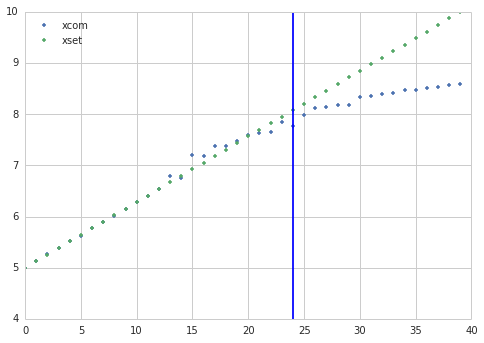

In [11]:
s = [mean(c) for c in xsets]
m = [mean(c) for c in xcoms]
plot(m,'.')
plot(s,'.')
legend(["xcom","xset"],loc="upper left")
axvline(24)
m[24]

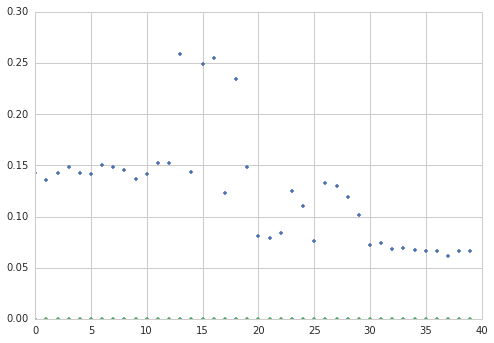

In [12]:
s = [std(c) for c in xsets]
m = [std(c) for c in xcoms]
plot(m,'.')
plot(s,'.')

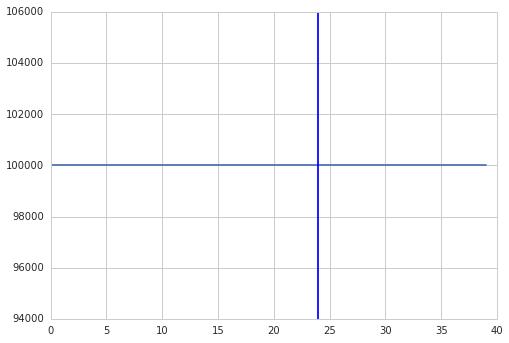

In [13]:
plot([len(x) for x in xcoms])
axvline(24)
#xcoms2 = [xcoms[i] for i in range(len(xcoms)) if i != 24]
#xcoms2 = [xcom[:15000] for xcom in xcoms]
xcoms2 = []
for x in xcoms:
    xcoms2 += list(x[:20000])

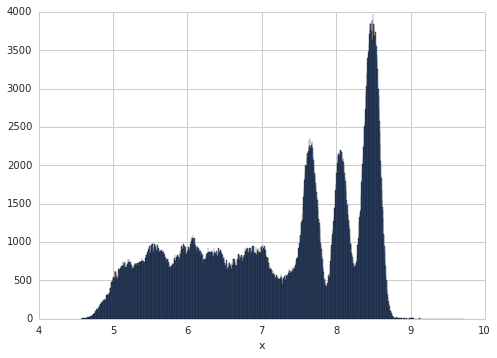

In [14]:
figure()
H = hist(array(xcoms2).flatten(),1000)
xlabel("x")

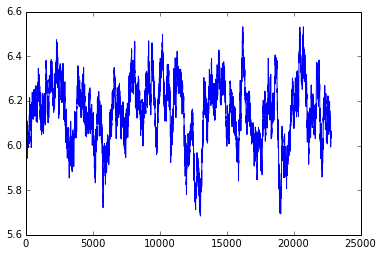

In [13]:
plot(xcoms[24])

In [22]:
datadir = "./second_40seeds/"
davinci_datadir = "/home/hantke/complex/md/05_snapshot/"+datadir
for d in [d for d in os.listdir(datadir) if d.startswith("snap_")]:
    cmd = "ssh davinci "
    cmd += "\"cd %s/%s; source ./env; cd out; gmx rotacf -f sim.xtc -s sim.tpr -o rotacf.xvg -n ../../eval.ndx\"" % (davinci_datadir,d)
    os.system(cmd)



In [38]:
xc = []
rc = []
dist = []
for d in [d for d in os.listdir(datadir) if d.startswith("snap_")]:
    filename_rotacf = "%s/%s/out/rotacf.xvg" % (datadir, d)
    reload(xvg)
    [tmpxc, tmprc] = xvg.read_xvg(filename_rotacf, 2)
    xc.append(tmpxc)
    rc.append(tmprc)
    dist.append(float(d.split("_")[-1][:-2]))

[ 0.91642923  0.3896821   0.52124429  1.        ]


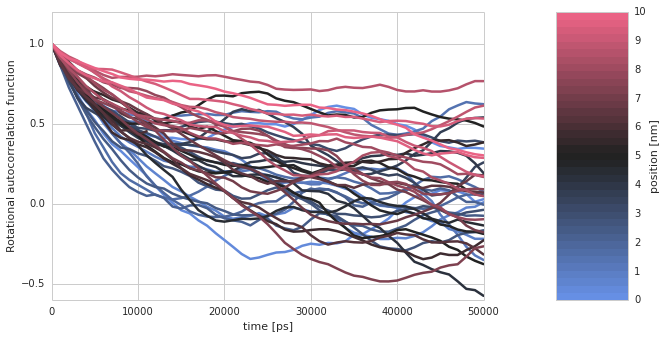

In [102]:
fig = figure(figsize=(10,5))
ax1 = fig.add_axes([0.1,0.1,0.6,0.8])
ax2 = fig.add_axes([0.8,0.1,0.1,0.8])
P = sns.diverging_palette(255, 0, l=60, n=len(xc), center="dark")
for x,r,c,di in zip(xc,rc,P,dist):
    ax1.plot(x, r, color=c, lw=2.5)
    #ax1.plot(di, min(r),"-", color=c)
    #ax1.axhline(r.std(), color=c, ls="-")
#colorbar(boundaries=[0,1], values=[0,1])
ax1.set_xlabel("time [ps]")
ax1.set_ylabel("Rotational autocorrelation function")
print c
cmap = matplotlib.colors.ListedColormap(P)#P#cm.get_cmap("winter")
norm = matplotlib.colors.BoundaryNorm(c, cmap.N)
cb = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap,
                                #norm=norm,
                                # to use 'extend', you must
                                # specify two extra boundaries:
                                boundaries=dist,
                                #extend='both',
                                ticks=linspace(0,10,11),  # optional
                                #spacing='proportional',
                                orientation='vertical')
cb.set_label("position [nm]")

    
    #colormaps(sns.color_palette("winter", len(xc))))

In [49]:
contourf?